In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_selection import RFE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for i in df.columns:
  print(df[i])

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object
0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64
0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object
0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object
0        1
1       34
2    

In [ ]:
df_copy = df.copy()  # Create a copy of the original DataFrame

senior_citizen= df_copy['SeniorCitizen']

churn_column = df_copy["Churn"]

label_encoder = LabelEncoder()
churn_encoded = label_encoder.fit_transform(churn_column)
df_copy["Churn"] = churn_encoded
churn_column = df_copy["Churn"]
# Drop the 'customerID','Citizen' column in the copied DataFrame

df_copy = df_copy.drop(columns=['Churn','SeniorCitizen','customerID'], axis =1)


# Convert 'TotalCharges' to numeric, handling errors with 'coerce'
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')

# Impute missing values in 'TotalCharges' with the mean
imputer = SimpleImputer(strategy='mean')
df_copy['TotalCharges'] = imputer.fit_transform(df_copy[['TotalCharges']])

# Select numerical columns in the copied DataFrame
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64'])

In [ ]:

categorical_columns = df_copy.select_dtypes(include=['object'])
label_encoders = {}
for col in categorical_columns.columns:
    le = LabelEncoder()
    categorical_columns[col] = le.fit_transform(categorical_columns[col])
    label_encoders[col] = le

for feature, encoder in label_encoders.items():
    print(f"Encoded feature: {feature}")
    print(f"Classes: {encoder.classes_}")
    print("\n")


Encoded feature: gender
Classes: ['Female' 'Male']


Encoded feature: Partner
Classes: ['No' 'Yes']


Encoded feature: Dependents
Classes: ['No' 'Yes']


Encoded feature: PhoneService
Classes: ['No' 'Yes']


Encoded feature: MultipleLines
Classes: ['No' 'No phone service' 'Yes']


Encoded feature: InternetService
Classes: ['DSL' 'Fiber optic' 'No']


Encoded feature: OnlineSecurity
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: OnlineBackup
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: DeviceProtection
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: TechSupport
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: StreamingTV
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: StreamingMovies
Classes: ['No' 'No internet service' 'Yes']


Encoded feature: Contract
Classes: ['Month-to-month' 'One year' 'Two year']


Encoded feature: PaperlessBilling
Classes: ['No' 'Yes']


Encoded feature: PaymentMethod
Classes: ['Bank t

In [ ]:
df_copy

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [ ]:
sc=StandardScaler()
scaled=sc.fit_transform(numerical_columns)
scaled_features= pd.DataFrame(scaled, columns=numerical_columns.columns)

In [ ]:
scaled_features

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193
...,...,...,...
7038,-0.340876,0.665992,-0.129281
7039,1.613701,1.277533,2.242808
7040,-0.870241,-1.168632,-0.855182
7041,-1.155283,0.320338,-0.872777


In [ ]:
categorical_columns

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [ ]:
churn_column

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
X= pd.concat([scaled_features, senior_citizen, categorical_columns], axis=1)

In [ ]:
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0.066327,-0.259629,-0.173876,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,-1.236724,-0.362660,-0.960399,0,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0.514251,-0.746535,-0.195400,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,1.613701,1.277533,2.242808,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,-0.870241,-1.168632,-0.855182,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,-1.155283,0.320338,-0.872777,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, churn_column, test_size=0.2, random_state=42)

# **EDA and Feature Engineering**

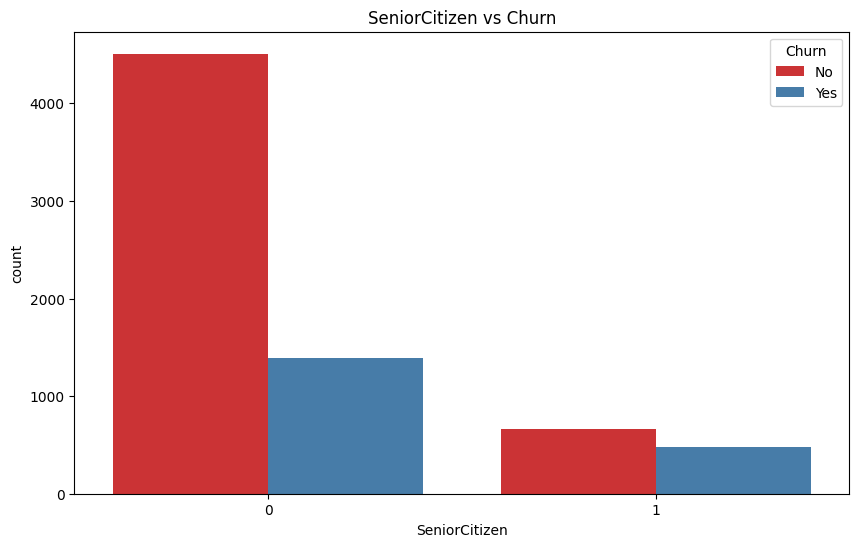

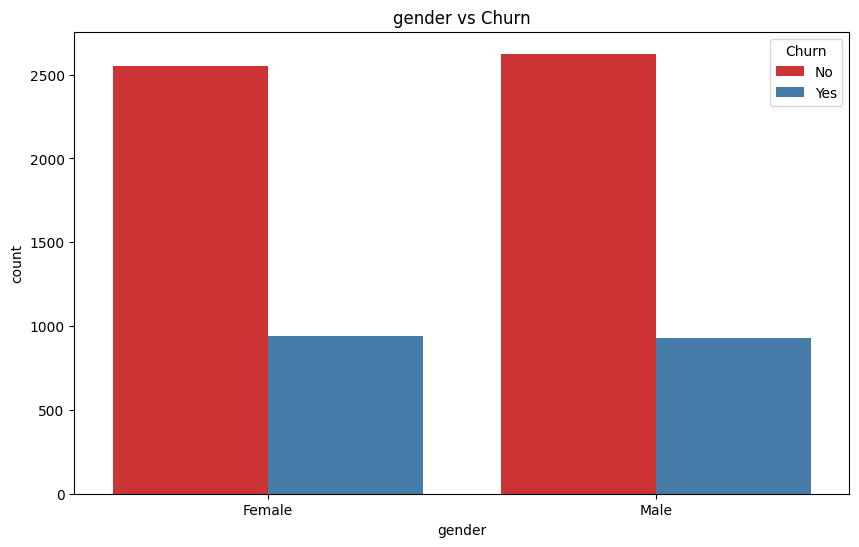

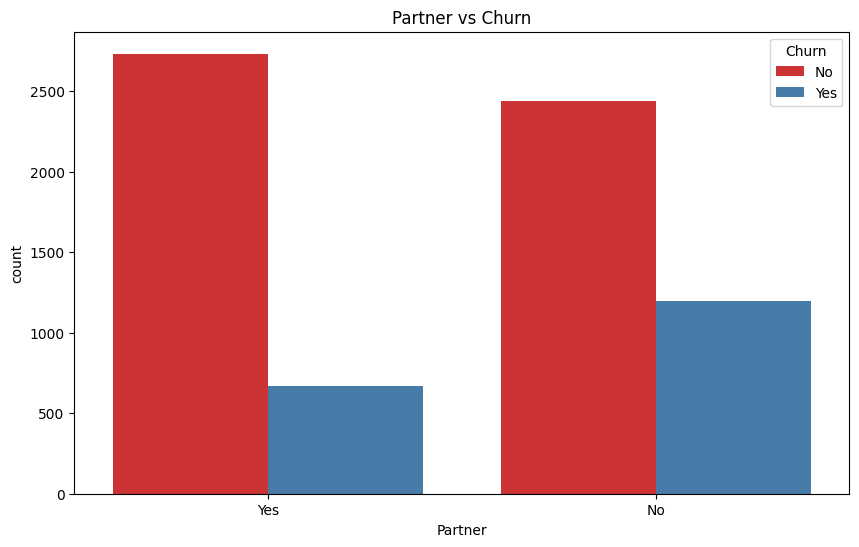

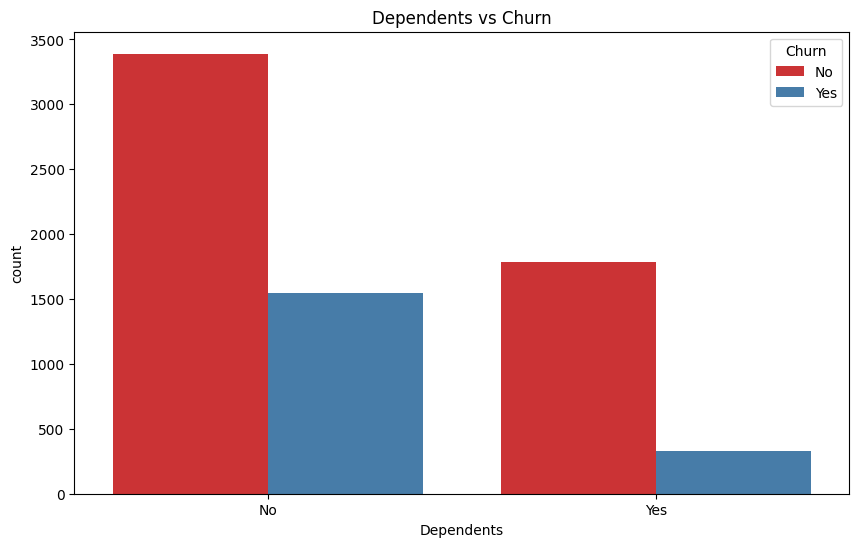

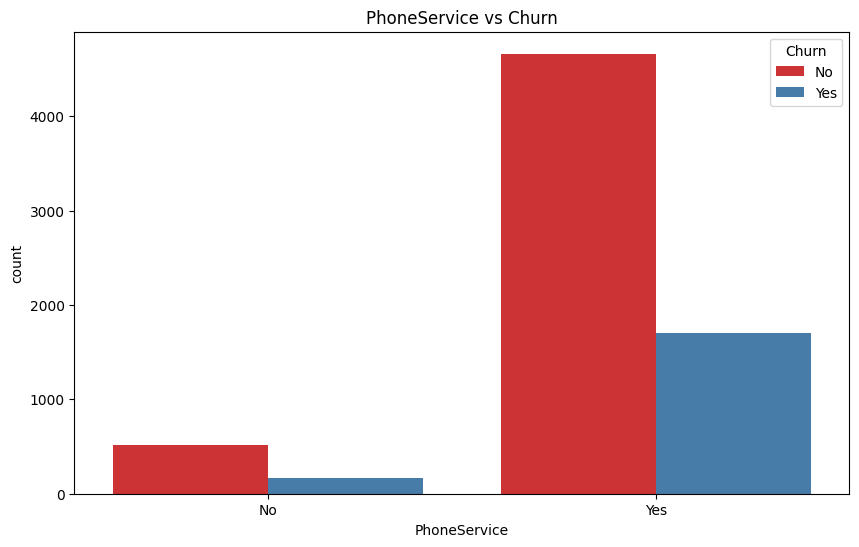

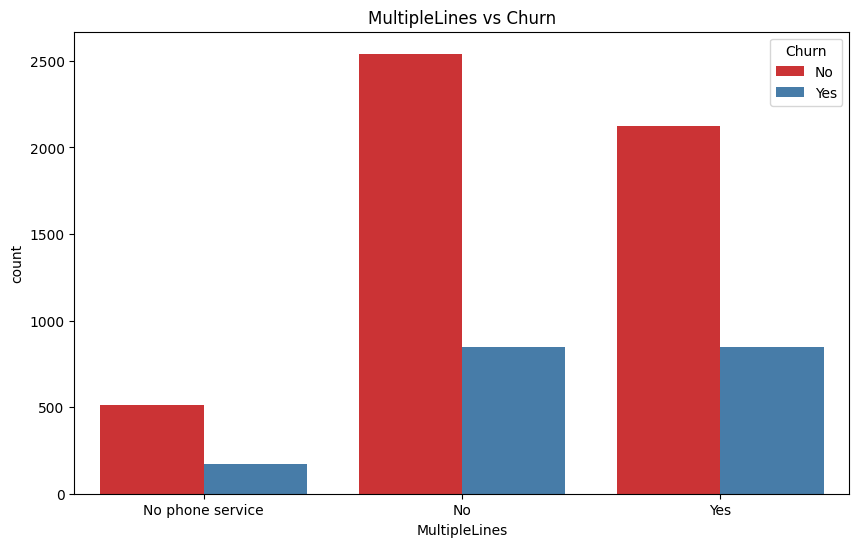

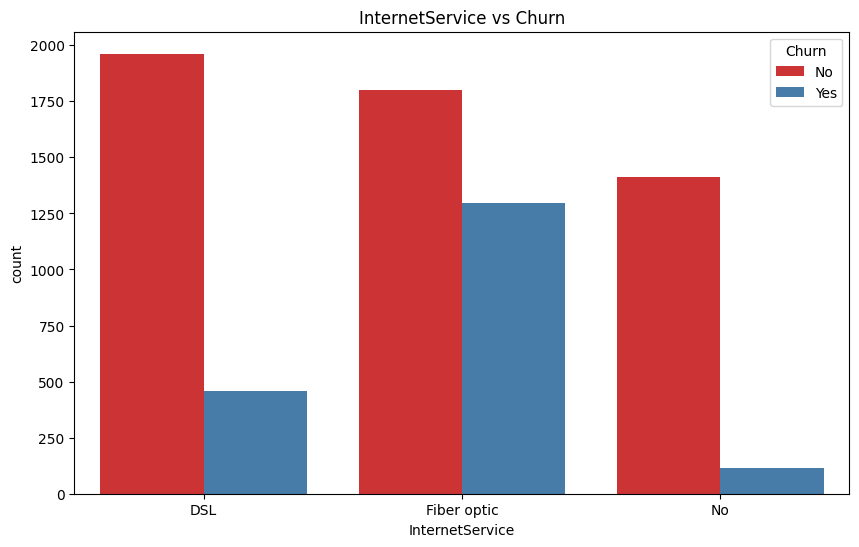

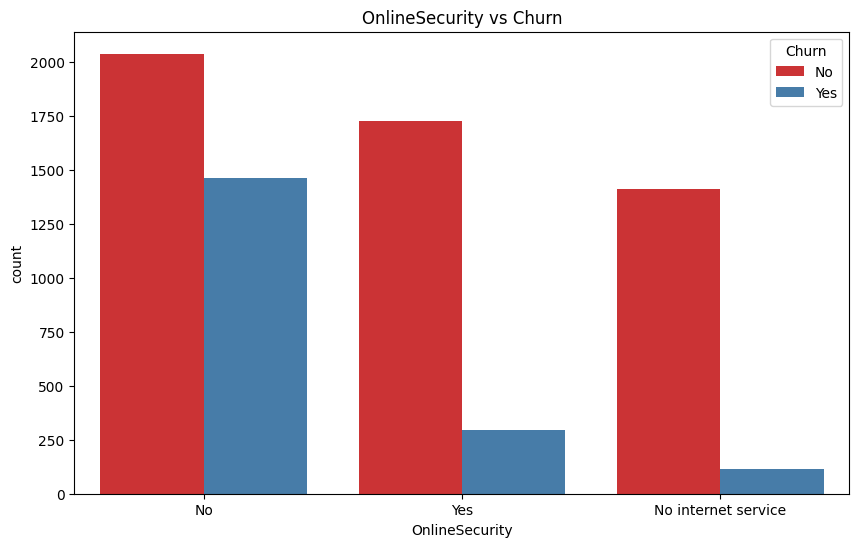

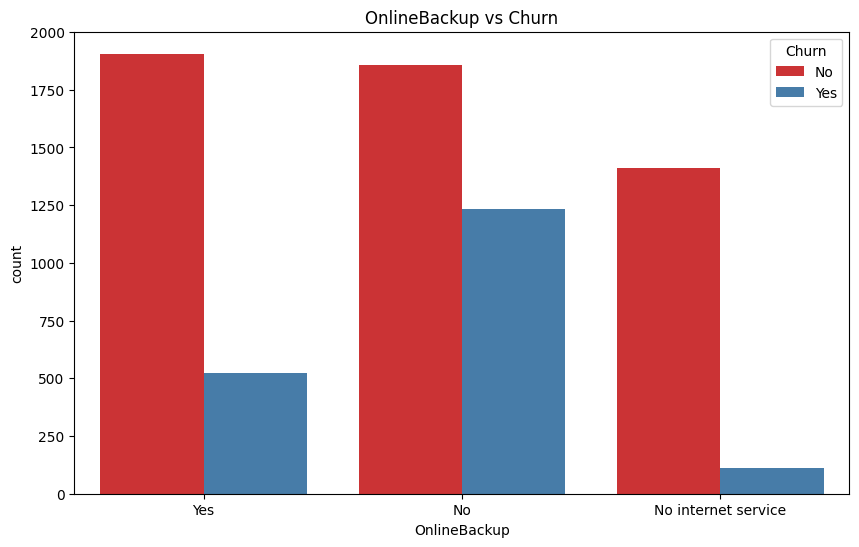

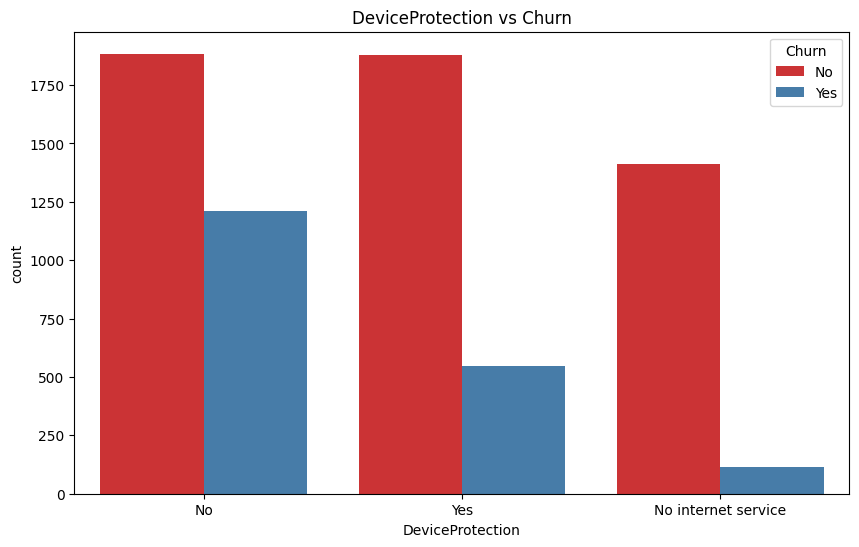

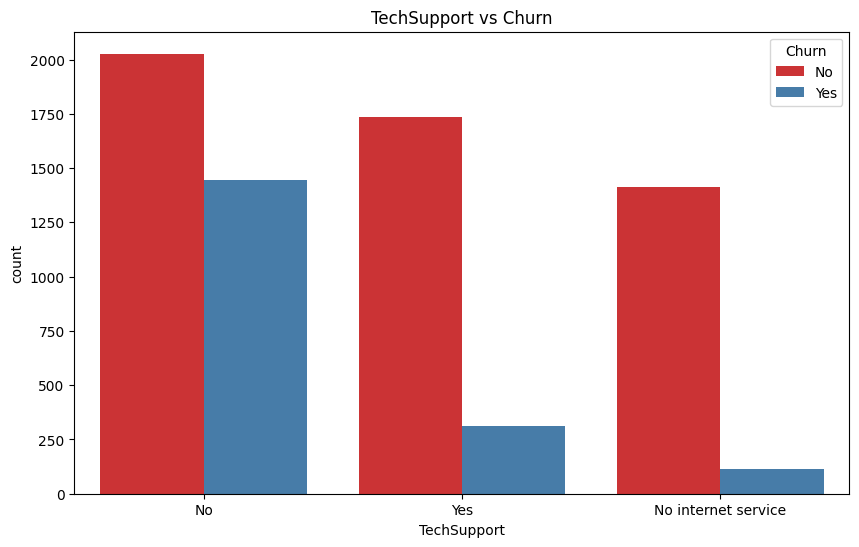

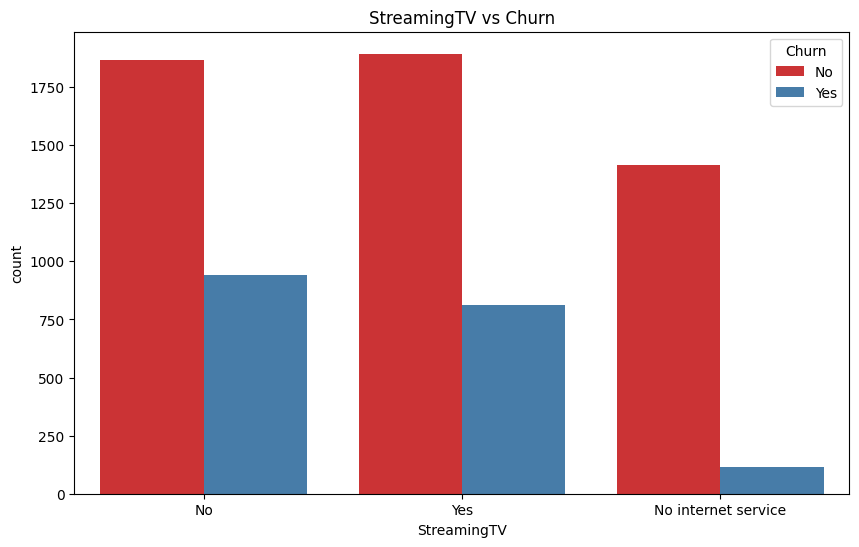

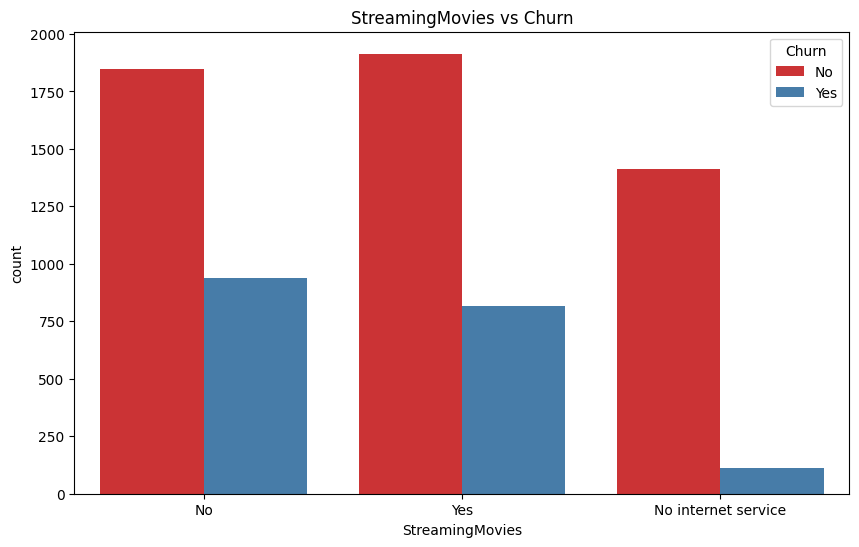

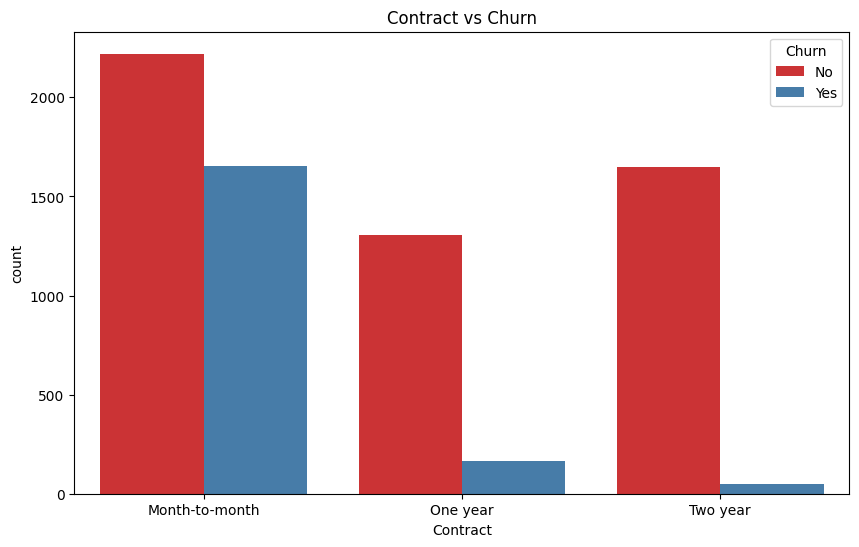

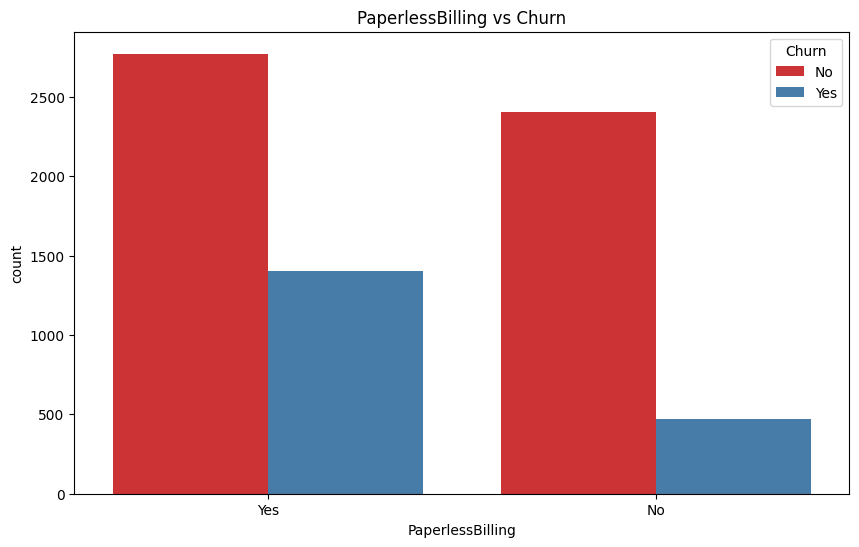

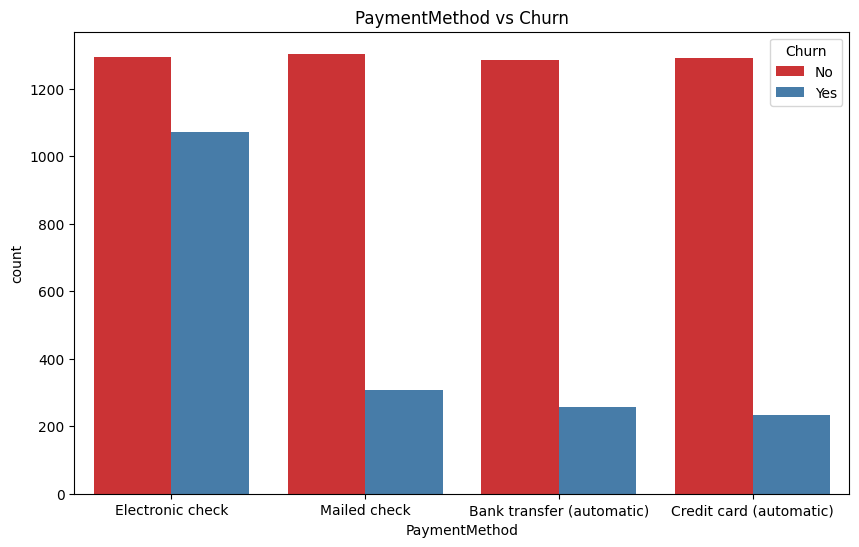

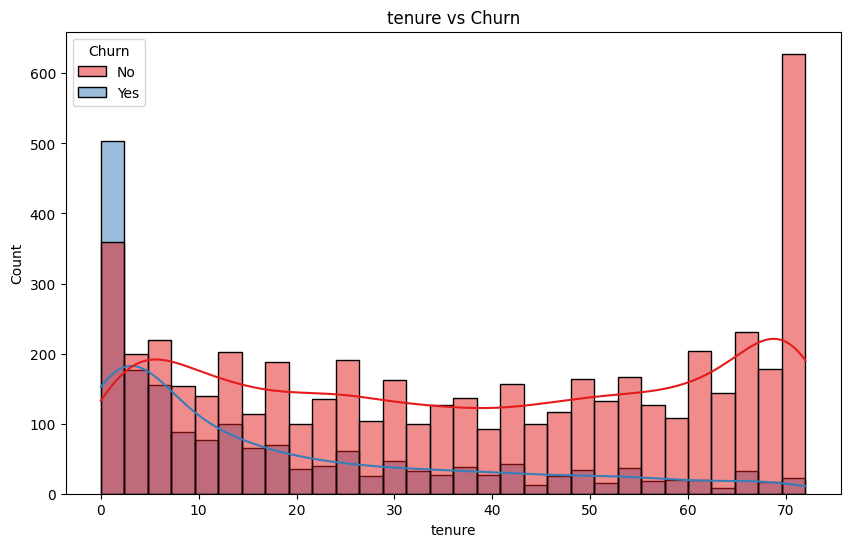

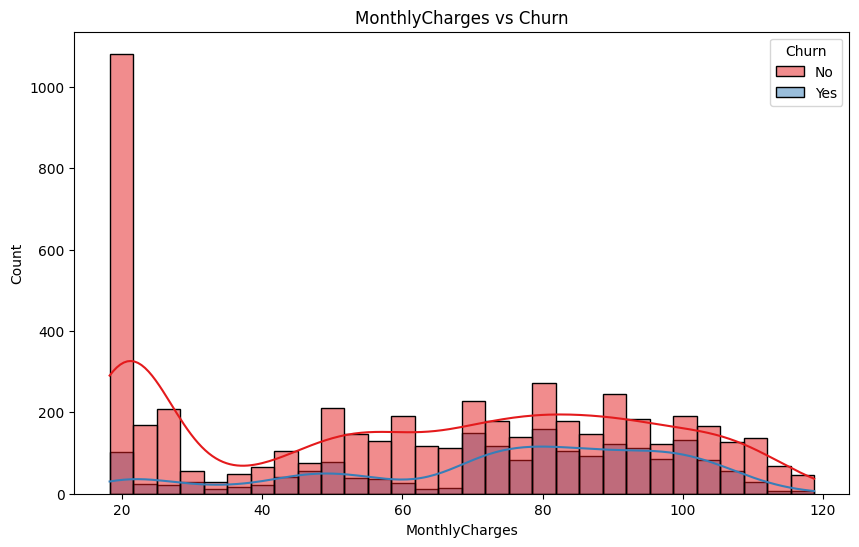

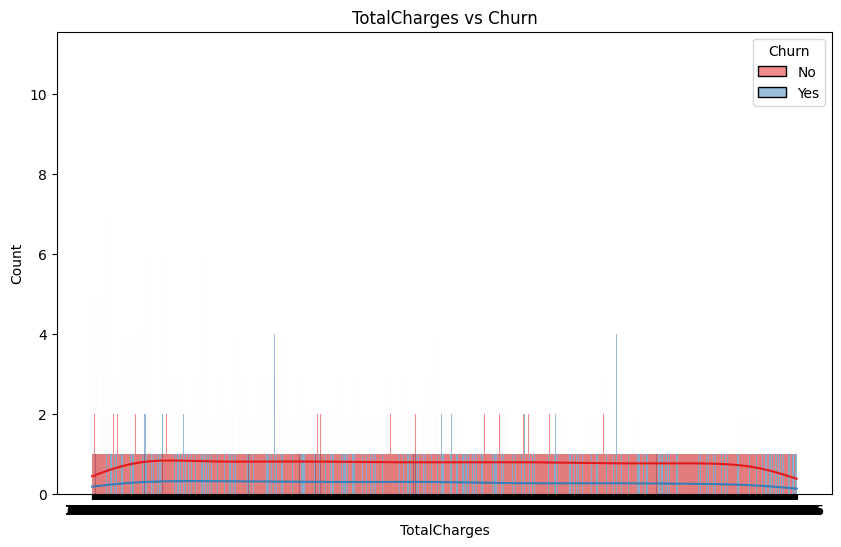

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Categorical features
categorical_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod']

# Numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting categorical features against Churn
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f'{feature} vs Churn')
    plt.show()

# Plotting numerical features against Churn
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=feature, hue='Churn', data=df, bins=30, kde=True, palette='Set1')
    plt.title(f'{feature} vs Churn')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(x_train, y_train)

RFECV(cv=3, estimator=RandomForestClassifier(random_state=42),
      scoring='accuracy')

In [ ]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_

Using the RandomForest classifier these are my selected features

In [ ]:
selected_features = X.columns[support_mask]
selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'gender',
       'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Selected Features and Their Ranks:
Feature 0: Rank 1
Feature 1: Rank 1
Feature 2: Rank 1
Feature 3: Rank 11
Feature 4: Rank 6
Feature 5: Rank 9
Feature 6: Rank 12
Feature 7: Rank 15
Feature 8: Rank 8
Feature 9: Rank 4
Feature 10: Rank 1
Feature 11: Rank 5
Feature 12: Rank 10
Feature 13: Rank 3
Feature 14: Rank 14
Feature 15: Rank 13
Feature 16: Rank 1
Feature 17: Rank 7
Feature 18: Rank 2


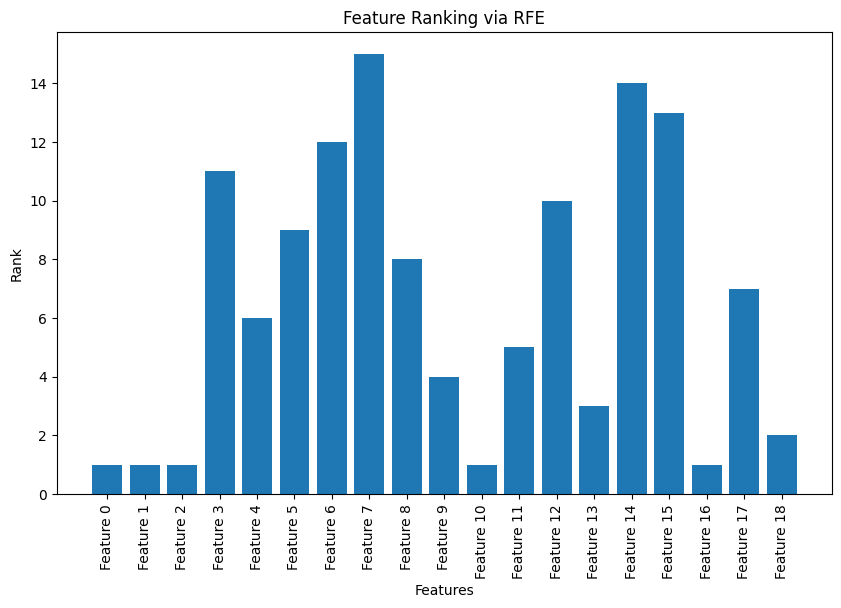

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Assuming you have your data in x and y

# Split the data into training and testing sets

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an RFE model
# You can specify the number of features to select with the 'n_features_to_select' parameter
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Select the top 5 features

# Fit the RFE model on the training data
rfe.fit(x_train, y_train)

# Get the ranking of features (1 = most important, higher ranks are less important)
feature_ranking = rfe.ranking_

# Get the support for selected features (True for selected features, False for eliminated features)
feature_support = rfe.support_

# Get the indices of selected features
selected_feature_indices = np.where(feature_support)[0]

# Print and visualize the selected features and their ranks
feature_names = [f"Feature {i}" for i in range(x_train.shape[1])]
print("Selected Features and Their Ranks:")
for feature, rank in zip(feature_names, feature_ranking):
    print(f"{feature}: Rank {rank}")

# You can also create a bar plot to visualize the feature ranks
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.xticks(range(len(feature_ranking)), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Rank")
plt.title("Feature Ranking via RFE")
plt.show()


# **MLP training using Functional API and Hyper Parameter tuning using cross-validation and grid search**

In [ ]:
X_Corr=X.copy()

In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the data into train and test sets while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, churn_column, test_size=0.2, random_state=42, stratify=churn_column)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the original and resampled class distribution
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))

Original class distribution: [4139 1495]
Resampled class distribution: [4139 4139]


In [ ]:
y_train.value_counts()

0    4139
1    1495
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
num_classes=1
epochs=30
batch_size=10

In [ ]:
def create_model(dropout_rate, weight_constraint,neurons,activation):
  # create modeloptimizer=optimizer
  input_shape = (X_Corr.shape[1],)
  inputs = tf.keras.Input(shape=input_shape)
  input = tf.keras.layers.Dense((28)+neurons, activation=activation)(inputs)
  x= tf.keras.layers.Dropout(dropout_rate)(input)
  second=tf.keras.layers.Dense((12)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(second)
  third=tf.keras.layers.Dense((4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(third)
  fourth=tf.keras.layers.Dense((-4)+neurons, activation=activation)(x)
  x= tf.keras.layers.Dropout(dropout_rate)(fourth)
  fifth=tf.keras.layers.Dense((-12)+neurons, activation=activation)(x)
# Add more hidden layers if necessary

# Add output layer with sigmoid activation
  outputs = tf.keras.layers.Dense(num_classes, activation='sigmoid')(fifth)

# Create the model
  m = tf.keras.Model(inputs=inputs, outputs=outputs)
  m.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return m


In [ ]:

model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
dropout_rate = [0.3, 0.5]
weight_constraint = [3.0, 5.0]
neurons = [20]
optimizer = ['SGD', 'Adam', 'RMSProp']
activation = ['relu']
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint,
                  model__neurons=neurons,model__activation=activation)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, scoring='accuracy')

# Initialize lists to store outer fold results
outer_scores = []
best_models = []
for train_idx, val_idx in outer_cv.split(X_train_resampled, y_train_resampled):
    X_train_outer, X_val_outer = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_outer, y_val_outer = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

    # Perform hyperparameter tuning in the inner loop
    grid_search.fit(X_train_outer, y_train_outer)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Evaluate the best model on the outer validation set
    y_pred_outer = best_model.predict(X_val_outer)
    accuracy = accuracy_score(y_val_outer, y_pred_outer)
    outer_scores.append(accuracy)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Outer CV Scores:", outer_scores)
print("Mean Accuracy:", np.mean(outer_scores))
print("Standard Deviation:", np.std(outer_scores))

# Train the final model on the entire training set with the best hyperparameters
final_best_model_mlp = grid_search.best_estimator_
print("The best estimator:",grid_search.best_estimator_, "\n")
final_best_model_mlp.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)



# Evaluate the model and obtain predicted probabilities
y_pred = final_best_model_mlp.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))

Outer CV Scores: [0.7620772946859904, 0.7506038647342995, 0.7765700483091788, 0.7613293051359517, 0.7691842900302115]
Mean Accuracy: 0.7639529605791264
Standard Deviation: 0.008662075512429758
The best estimator: KerasClassifier(
	model=<function create_model at 0x7a311cba5d80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	model__activation=relu
	model__dropout_rate=0.3
	model__neurons=20
	model__weight_constraint=3.0
	class_weight=None
) 

AUC: 0.7511

CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
grid_search.best_params_

{'model__activation': 'relu',
 'model__dropout_rate': 0.3,
 'model__neurons': 20,
 'model__weight_constraint': 3.0}

In [ ]:
import tensorflow as tf

def create_mlp(neurons=20, activation='relu', dropout_rate=0.3, weight_constraint=3.0):
    input_shape = (X_Corr.shape[1],)
    inputs = tf.keras.Input(shape=input_shape)
    x = Dense(neurons, activation=activation, kernel_constraint=tf.keras.constraints.MaxNorm(weight_constraint))(inputs)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    final_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return final_model

# Assuming input_size is the size of your input features
input_size = 10  # Replace with the actual size of your input features

# Create the MLP model
final_model = create_mlp(neurons=20, activation='relu', dropout_rate=0.3, weight_constraint=3.0)

final_model.fit(X_train_resampled, y_train_resampled,epochs=epochs, batch_size=batch_size, verbose=0)

y_pred = final_model.predict(X_test)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_pred)
auc_mlp = round(metrics.roc_auc_score(y_test, y_pred), 4)
print("AUC:",auc_mlp)
y_pred=np.round(final_best_model_mlp.predict(X_test)).ravel()
print("\nCR by library method=\n",
          classification_report(y_test, y_pred))




45/45 [==============================] - 0s 920us/step
AUC: 0.8427

CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
import pickle

from tensorflow.keras.models import save_model

# Assuming 'model' is your MLP model
model_filename = 'mlp_model.h5'
final_model.save(model_filename)


# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump({'scaler': sc}, scaler_file)

# Save the encoder
encoder_filename = 'encoder.pkl'
with open(encoder_filename, 'wb') as encoder_file:
    pickle.dump({'encoder': le}, encoder_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
